In [2]:
import osmnx as ox
G = ox.load_graphml('data/porto-bbox.graphml')

In [3]:
import pandas as pd


In [4]:
mr = pd.read_csv('data/mr-mgeom.csv', sep=';', index_col=0)
mr.sort_index(inplace=True)
mr

opath  \
id                                                        
1     1095,1095,2732,2732,1093,1093,698,698,696,8687...   
2     56205,56205,4790,70940,762,26201,26213,26202,5...   
3                                                   NaN   
4                                                   NaN   
5     67262,67262,67260,5878,5880,61719,765,70690,73...   
...                                                 ...   
996                                                 NaN   
997                                                 NaN   
998   69300,69300,40862,40862,68548,40863,69301,6930...   
999   26480,26480,26480,26480,26480,1381,1381,1381,1...   
1000  65295,65295,65295,65295,65295,65295,65295,6529...   

                                                  cpath  \
id                                                        
1     1095,2732,1093,698,8704,62550,8703,696,8687,17...   
2     56205,69910,69917,69912,4790,56207,26241,70940...   
3                                                   NaN   
4                                                   NaN   
5     67262,67260,57887,67265,5875,5878,5880,41236,6...   
...                                                 ...   
996                                                 NaN   
997                                                 NaN   
998   69300,40862,68548,68549,40865,40863,40862,6854...   
999   26480,1381,1384,1388,62565,58941,1515,66065,15...   
1000  65295,5413,5385,61516,832,903,174,62758,6540,7...   

                                                  mgeom  
id                                                       
1     LINESTRING(-8.61862328377 41.1414555366,-8.618...  
2     LINESTRING(-8.63985895545 41.159750087,-8.6405...  
3                                          LINESTRING()  
4                                          LINESTRING()  
5     LINESTRING(-8.6457599 41.1805278,-8.645788 41....  
...                                                 ...  
996                                        LINESTRING()  
997                                        LINESTRING()  
998   LINESTRING(-8.58610277406 41.1485589137,-8.586...  
999   LINESTRING(-8.60648698734 41.1483614519,-8.606...  
1000  LINESTRING(-8.60008501999 41.1828016703,-8.599...  

[999 rows x 3 columns]

In [5]:

import shapely.wkt


mr = mr.loc[mr['mgeom'] != 'LINESTRING()']
mr['mgeom'] = mr['mgeom'].apply(shapely.wkt.loads)
mr['mgeom']

id
1       LINESTRING (-8.618623283770001 41.1414555366, ...
2       LINESTRING (-8.63985895545 41.159750087, -8.64...
5       LINESTRING (-8.6457599 41.1805278, -8.645788 4...
6       LINESTRING (-8.615516793139999 41.140715625, -...
7       LINESTRING (-8.579496153999999 41.1459330735, ...
                              ...                        
994     LINESTRING (-8.59697443774 41.1507050705, -8.5...
995     LINESTRING (-8.639824793960001 41.1597447069, ...
998     LINESTRING (-8.58610277406 41.1485589137, -8.5...
999     LINESTRING (-8.60648698734 41.1483614519, -8.6...
1000    LINESTRING (-8.600085019990001 41.1828016703, ...
Name: mgeom, Length: 948, dtype: object

In [6]:
import numpy as np
routes = [np.array([list(i) for i in mr['mgeom'].iloc[j].coords]) for j in range(len(mr.index))]

In [7]:
import pandas as pd
raw_trips = pd.read_csv('data/train-1000.csv')

from ast import literal_eval
trajectories = [literal_eval(raw_trips['POLYLINE'].iloc[i]) for i in range(len(raw_trips.index))]

In [8]:
print(trajectories[1])

[[-8.639847, 41.159826], [-8.640351, 41.159871], [-8.642196, 41.160114], [-8.644455, 41.160492], [-8.646921, 41.160951], [-8.649999, 41.161491], [-8.653167, 41.162031], [-8.656434, 41.16258], [-8.660178, 41.163192], [-8.663112, 41.163687], [-8.666235, 41.1642], [-8.669169, 41.164704], [-8.670852, 41.165136], [-8.670942, 41.166576], [-8.66961, 41.167962], [-8.668098, 41.168988], [-8.66664, 41.170005], [-8.665767, 41.170635], [-8.66574, 41.170671]]


In [22]:
def get_bbox(coords):
    padding = 0.00001
    north, south, east, west = 0, 100, -100, 0
    for c in coords:
        if c[0] > east: east = c[0]
        if c[0] < west: west = c[0]
        if c[1] > north: north = c[1]
        if c[1] < south: south = c[1]
    return (north + padding, south - padding, east + padding, west - padding)

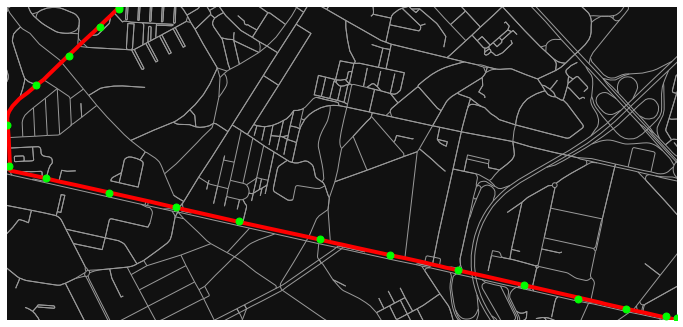

In [11]:
import matplotlib.pyplot as plt

ROUTE_INDEX = 1
bbox = get_bbox(routes[ROUTE_INDEX].tolist() + trajectories[ROUTE_INDEX])

# Draw the basemap
fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False, figsize=(12, 12), bbox=bbox)

# Plot the route on the basemap
plt.plot(*routes[ROUTE_INDEX].T, color='red', linewidth=4, zorder=1)

# Plot the raw GPS points on the basemap
for coord in trajectories[ROUTE_INDEX]:
    ax.scatter(coord[0], coord[1], c='lime', s=48, zorder=2)

# fig.savefig('output/task5-2-3.png', bbox_inches='tight', pad_inches=0)
# plt.close(fig)
plt.show()

In [18]:
mr_fail = pd.read_csv('data/mr.csv', sep=';', index_col=0)
mr_fail.sort_index(inplace=True)
mr_fail = mr_fail.loc[~mr_fail.cpath.notnull()]
mr_fail['pgeom'] = mr_fail['pgeom'].apply(shapely.wkt.loads)
mr_fail = mr_fail['pgeom']

opath  \
id                                                       
3    58119,58119,58119,58118,62562,62562,2732,2732,...   
9    58120,58120,702,58119,58119,58118,2731,62561,6...   
15   58119,58119,58119,58118,62561,2731,2731,58083,...   
45   702,58119,58118,58604,62560,58603,705,1400,635...   
66   58084,65096,59060,62636,1395,8654,8656,8656,58...   
78   59307,59307,83,78,78,78,58512,1355,1357,1357,5...   
133  702,702,702,702,702,702,58119,71617,71617,6256...   
164  1359,1359,62890,61460,61214,1486,63541,62537,6...   
176  62629,928,928,16067,16067,16067,16067,4556,553...   
177  1357,1357,55250,55250,8655,8655,58123,58121,58...   
366  58119,58119,58119,71617,2731,57135,701,55235,5...   
401  55248,55248,60930,60930,2732,1093,1093,698,698...   
404  14962,14962,14962,47103,14960,47076,1295,69689...   
444  62561,62561,62562,60930,55248,55248,2732,2732,...   
445  703,65094,69323,69323,71617,62562,62562,2732,2...   
492  63541,63541,62636,62636,58604,62562,2732,2732,...   
550  59087,59087,59087,59087,3755,4698,1046,5498,46...   
570  40862,40862,40862,40862,68547,69302,69303,5138...   
612  60930,60930,60930,60930,1095,2731,58603,8451,2...   
621  1398,1398,64780,64700,2725,2725,2725,2725,1600...   
701  4725,4725,4729,59621,2782,5243,5243,5243,1266,...   
710  5925,5925,5918,5918,5925,5925,5925,1030,1032,5...   
779  55248,55248,55248,55248,55248,2732,2732,1093,6...   
807  64450,60429,60432,60432,60432,70,70,70,70,72,6...   
996  59594,59593,69326,1599,1599,67542,67542,1491,1...   

                                                 pgeom cpath         mgeom  
id                                                                          
3    LINESTRING (-8.613041600000001 41.1403814, -8....   NaN  LINESTRING()  
9    LINESTRING (-8.61179351282 41.1405519704, -8.6...   NaN  LINESTRING()  
15   LINESTRING (-8.613041600000001 41.1403814, -8....   NaN  LINESTRING()  
45   LINESTRING (-8.61304269483 41.1403859357, -8.6...   NaN  LINESTRING()  
66   LINESTRING (-8.6153165 41.140775, -8.614505940...   NaN  LINESTRING()  
78   LINESTRING (-8.61987747375 41.1480400657, -8.6...   NaN  LINESTRING()  
133  LINESTRING (-8.61314906012 41.1408632653, -8.6...   NaN  LINESTRING()  
164  LINESTRING (-8.612469519279999 41.1459693195, ...   NaN  LINESTRING()  
176  LINESTRING (-8.62810299225 41.1573895588, -8.6...   NaN  LINESTRING()  
177  LINESTRING (-8.61763134039 41.1461176829, -8.6...   NaN  LINESTRING()  
366  LINESTRING (-8.613041600000001 41.1403814, -8....   NaN  LINESTRING()  
401  LINESTRING (-8.61922723514 41.142028125, -8.61...   NaN  LINESTRING()  
404  LINESTRING (-8.57608627292 41.1603070694, -8.5...   NaN  LINESTRING()  
444  LINESTRING (-8.61559901171 41.1406864053, -8.6...   NaN  LINESTRING()  
445  LINESTRING (-8.614278000000001 41.1411531, -8....   NaN  LINESTRING()  
492  LINESTRING (-8.61214357895 41.1442445522, -8.6...   NaN  LINESTRING()  
550  LINESTRING (-8.60409285886 41.1611284941, -8.6...   NaN  LINESTRING()  
570  LINESTRING (-8.586044100000001 41.1488668, -8....   NaN  LINESTRING()  
612  LINESTRING (-8.619330669309999 41.1420996972, ...   NaN  LINESTRING()  
621  LINESTRING (-8.61085903387 41.1456608595, -8.6...   NaN  LINESTRING()  
701  LINESTRING (-8.611167399999999 41.1717854, -8....   NaN  LINESTRING()  
710  LINESTRING (-8.6499696341 41.1659399906, -8.64...   NaN  LINESTRING()  
779  LINESTRING (-8.619337596159999 41.1421044903, ...   NaN  LINESTRING()  
807  LINESTRING (-8.61467185517 41.1509078171, -8.6...   NaN  LINESTRING()  
996  LINESTRING (-8.6111678 41.143066, -8.610710915...   NaN  LINESTRING()

In [19]:
fail_traj = [np.array([list(i) for i in mr_fail['pgeom'].iloc[j].coords]) for j in range(len(mr_fail.index))]

In [24]:
for idx, traj in enumerate(fail_traj):
    bbox = get_bbox(traj.tolist())

    # Draw the basemap
    fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False, figsize=(12, 12), bbox=bbox)

    # Plot the raw GPS points on the basemap
    for coord in traj:
        ax.scatter(coord[0], coord[1], c='lime', s=48)

    fig.savefig(f'output/task6-bad/{idx+1:02d}.png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    print(f'{idx+1:02d}/{len(fail_traj)} finished')

01/25 finished
02/25 finished
03/25 finished
04/25 finished
05/25 finished
06/25 finished
07/25 finished
08/25 finished
09/25 finished
10/25 finished
11/25 finished
12/25 finished
13/25 finished
14/25 finished
15/25 finished
16/25 finished
17/25 finished
18/25 finished
19/25 finished
20/25 finished
21/25 finished
22/25 finished
23/25 finished
24/25 finished
25/25 finished
